In [48]:
#Come from the backend
marker_lat = 46.8862
marker_lon = -79.3832

In [49]:
from pathlib import Path

file_path = Path('/content/earthquakes.txt')

data = file_path.read_text()

In [50]:
lines = data.splitlines()
new = lines[1].split('|')
new[0] = new[0][9:11]
months = []
latitudes = []
longitudes = []
for line in lines[1:]:

  new = line.split('|')
  months.append(int(new[0][4:6]))
  latitudes.append(float(new[2]))
  longitudes.append(float(new[3]))

monthlist = ['02/24', '03/24', '04/24', '05/24', '06/24', '07/24', '08/24', '09/24', '10/24', '11/24', '12/24', '01/25']
incidents = [0,0,0,0,0,0,0,0,0,0,0,0]

import geopy.distance


for i in range(len(months)):
  coords_1 = (marker_lat, marker_lon)
  coords_2 = (latitudes[i], longitudes[i])

  distance = geopy.distance.geodesic(coords_1, coords_2).km
  if distance < 900:
    if months[i] != 1:
      incidents[months[i] - 2] = incidents[months[i] - 2] + 1
    else:
      incidents[11] = incidents[11] + 1

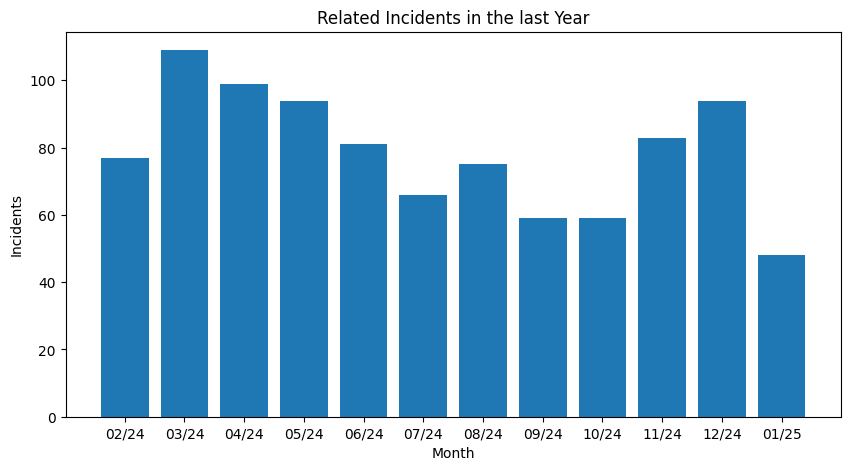

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(monthlist, incidents)
plt.title('Related Incidents in the last Year')
plt.xlabel('Month')
plt.ylabel('Incidents')
plt.savefig('foo.png')